## Creating a CNN Using Scratch And Transfer Learning

#### Description: 
Using deep learning based image classification techniques to identify Manufacturing defects during Casting. <br> Casting is a manufacturing process in which a liquid material is usually poured into a mold, which contains a hollow cavity of the desired shape, and then allowed to solidify. 

#### Dataset:
Kaggle: Casting Product Image Data for Quality Inspection - [Dataset Here](https://www.kaggle.com/ravirajsinh45/real-life-industrial-dataset-of-casting-product)

#### Importing Essential Libraries 

In [29]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [30]:
# import the libraries as shown below
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import pandas

In [32]:
# Re-Size all the images
IMAGE_SIZE = [224, 224]

train_path = 'Data/train'
valid_path = 'Data/test'


## Method 1 : Transfer Learning Using VGG16 & VGG19 CNN 

In [33]:
# Import the Vgg 19 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [34]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [35]:
# This code prevents training the existing weights again 
for layer in vgg19.layers:
    layer.trainable = False

In [36]:
# useful for getting number of output classes
folders = glob('Data/train/*')

In [37]:
folders

['Data/train\\def_front', 'Data/train\\ok_front']

In [38]:
# our layers - you can add more if you want
x = Flatten()(vgg19.output)

In [39]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [40]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

## Method 2 : Manual Model Creation - Computationally Efficient 

In [41]:
# Model Building 
from tensorflow.keras.layers import MaxPooling2D

In [42]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 50176)            

In [43]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [44]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [45]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 6633 images belonging to 2 classes.


In [46]:
training_set

In [47]:
test_set = test_datagen.flow_from_directory('Data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 715 images belonging to 2 classes.


### Model Fitting 

In [48]:
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=2,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 208 steps, validate for 23 steps
Epoch 1/2
208/208 [==============================] - 490s 2s/step - loss: 0.5784 - accuracy: 0.7288 - val_loss: 0.2313 - val_accuracy: 0.9203
Epoch 2/2
208/208 [==============================] - 488s 2s/step - loss: 0.2596 - accuracy: 0.8943 - val_loss: 0.2260 - val_accuracy: 0.9035


### The model validation accuracy after running two epochs is 0.91

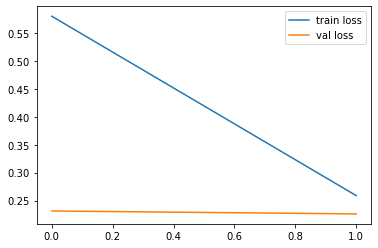

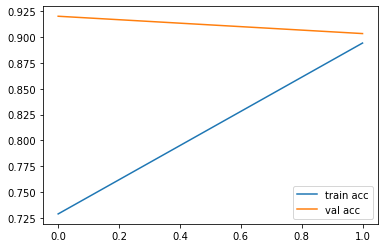

<Figure size 432x288 with 0 Axes>

In [49]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

## Model Export using Model.Save()

In [50]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('model.h5')

In [51]:
y_pred = model.predict(test_set)

In [52]:
y_pred

array([[9.99970436e-01, 2.95410300e-05],
       [3.07982445e-01, 6.92017496e-01],
       [4.39776242e-01, 5.60223699e-01],
       ...,
       [8.99154782e-01, 1.00845166e-01],
       [3.20136905e-01, 6.79863036e-01],
       [9.98665094e-01, 1.33485137e-03]], dtype=float32)

In [53]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [54]:
y_pred

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,

### Model Validation against actual images

In [55]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [56]:
model=load_model('model.h5')

In [93]:
img=image.load_img('Data/test/def_front/cast_def_0_144.jpeg',target_size=(224,224))

In [94]:
x=image.img_to_array(img)
x

array([[[145., 145., 145.],
        [144., 144., 144.],
        [143., 143., 143.],
        ...,
        [108., 108., 108.],
        [108., 108., 108.],
        [108., 108., 108.]],

       [[145., 145., 145.],
        [144., 144., 144.],
        [143., 143., 143.],
        ...,
        [109., 109., 109.],
        [109., 109., 109.],
        [109., 109., 109.]],

       [[145., 145., 145.],
        [144., 144., 144.],
        [143., 143., 143.],
        ...,
        [110., 110., 110.],
        [110., 110., 110.],
        [110., 110., 110.]],

       ...,

       [[174., 174., 174.],
        [175., 175., 175.],
        [176., 176., 176.],
        ...,
        [158., 158., 158.],
        [154., 154., 154.],
        [146., 146., 146.]],

       [[175., 175., 175.],
        [175., 175., 175.],
        [176., 176., 176.],
        ...,
        [158., 158., 158.],
        [154., 154., 154.],
        [146., 146., 146.]],

       [[178., 178., 178.],
        [177., 177., 177.],
        [176., 1

In [95]:
x.shape

(224, 224, 3)

In [96]:
x=x/255

In [97]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [98]:
model.predict(img_data)

array([[1., 0.]], dtype=float32)

In [99]:
a=np.argmax(model.predict(img_data), axis=1)

In [100]:
if(a==0):
    print("Ok")
else:
    print("Defective")

Ok
